In [22]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np
from scipy import stats
import optuna
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

## **Data Reading**

In [23]:
df = pd.read_csv('../Data/Telecom_Customers_Churn_Processed.csv')

In [24]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  \
0       0              0        1           0       1               0   
1       1              0        0           0      34               1   
2       1              0        0           0       2               1   
3       1              0        0           0      45               1   
4       0              0        0           0       2               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  Churn  \
0             1                 0            0            0  ...      0   
1             0                 1            0            0  ...      0   
2             1                 0            0            0  ...      1   
3             0                 1            1            0  ...      0   
4             0                 0            0            0  ...      1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1                             0.0                0.0   
2                             0.0                0.0   
3                             1.0                0.0   
4                             0.0                0.0   

   InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                          0.0                 0.0                0.0   
1                          0.0                 0.0                1.0   
2                          0.0                 0.0                0.0   
3                          0.0                 0.0                1.0   
4                          1.0                 0.0                0.0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                0.0                                    0.0   
1                0.0                                    0.0   
2                0.0                                    0.0   
3                0.0                                    0.0   
4                0.0                                    0.0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                             1.0                         0.0  
1                             0.0                         1.0  
2                             0.0                         1.0  
3                             0.0                         0.0  
4                             1.0                         0.0  

[5 rows x 24 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

In [26]:
X = df.drop(columns=['Churn'])
y = df.Churn

## **Unsupervised ML Models**

### **Finding The Optimal Number of Clusters**
1. **Elbow Method.**
2. **Silhouette Coefficient**.
3. **Dendogram**
4. **T-SNE**

#### **Elbow Method**

2178387.140066292


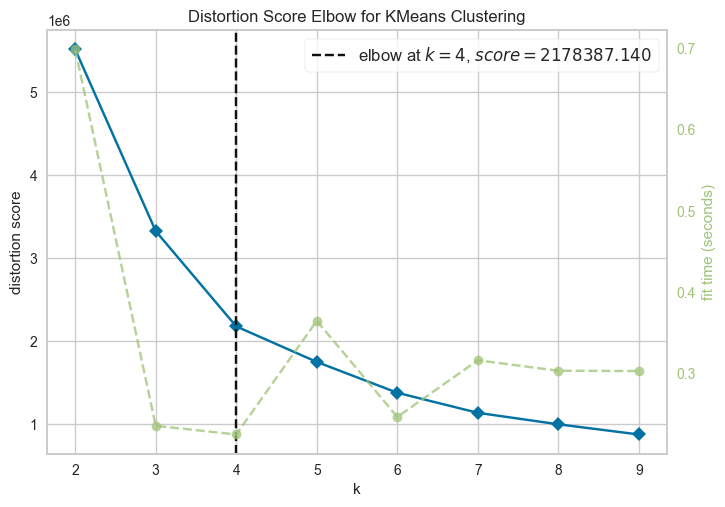

0.4657094101182724


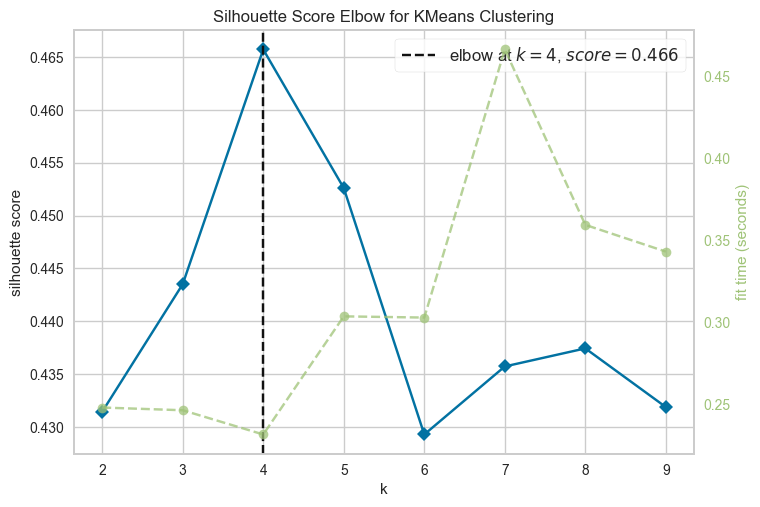

In [6]:
metrics = ['distortion', 'silhouette']
for metric in metrics:
    km = KMeans(random_state=0, n_init=10)
    visualizer = KElbowVisualizer(km, k=(2,10), metric=metric)
    visualizer.fit(X)
    print(visualizer.elbow_score_)
    visualizer.show() 

#### **Silhouette Score**

In [8]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(X)
    print(f"{i} clusters = {visualizer.silhouette_score_}")
plt.close()

2 clusters = 0.43144872768366416
3 clusters = 0.44351326803411856
4 clusters = 0.4657094101182724
5 clusters = 0.4526017849981835
6 clusters = 0.42929491122848334
7 clusters = 0.43572916433973463
8 clusters = 0.4374365383445696
9 clusters = 0.4318871895910772


#### **Dendogram**

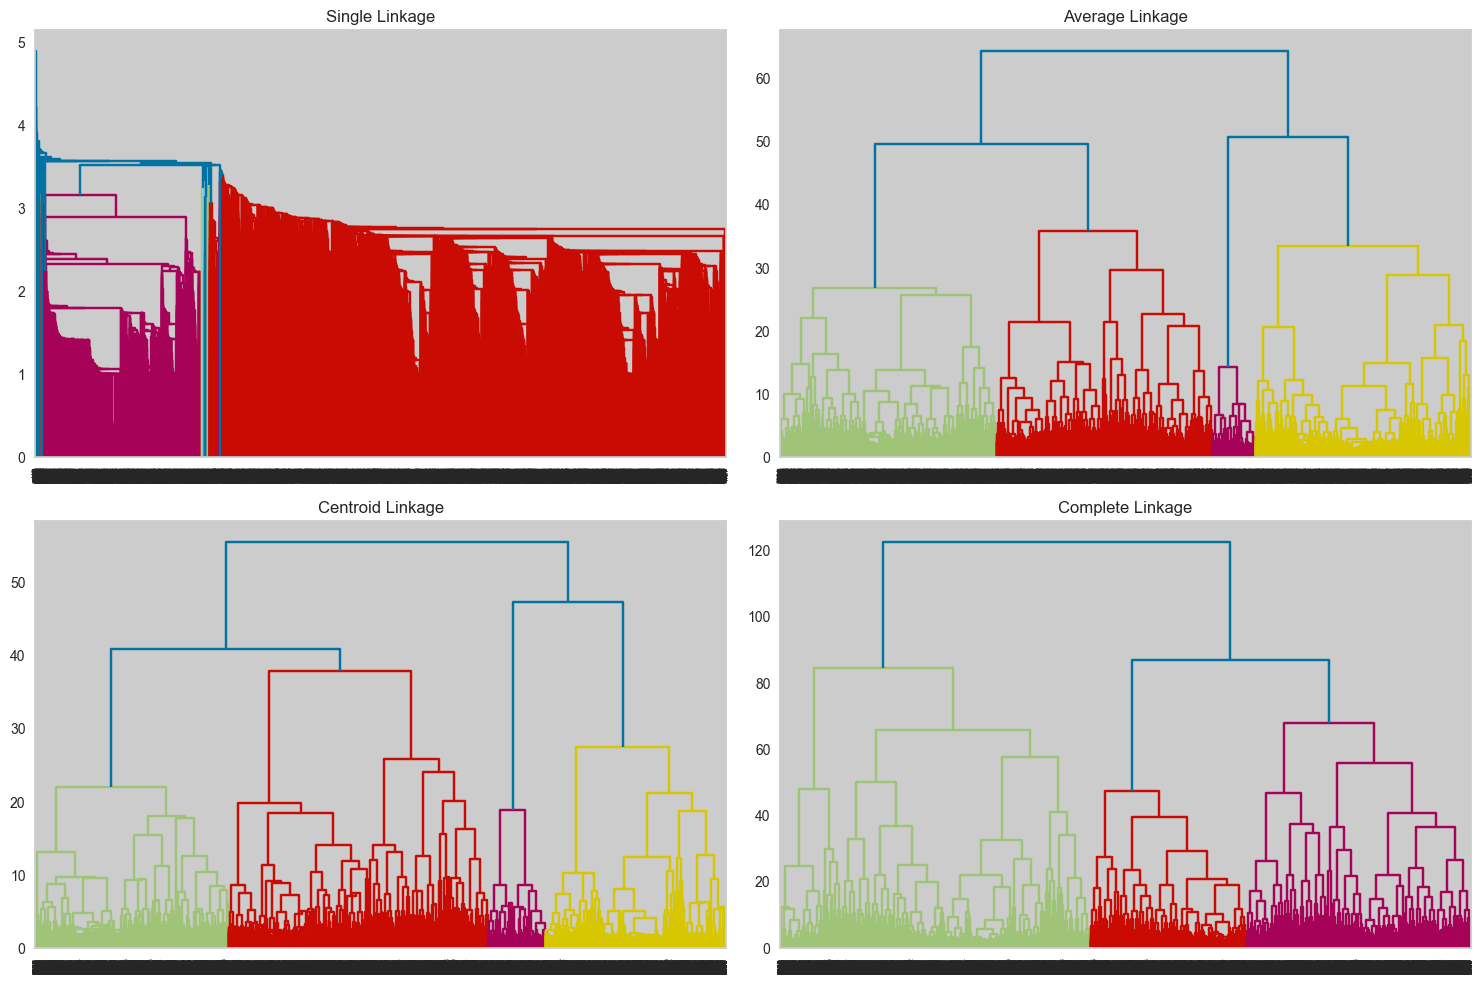

In [79]:
methods = ['single', 'average', 'centroid', 'complete']


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, method in enumerate(methods):
    plt.sca(axes[i])
    plt.title(f"{method.capitalize()} Linkage")
    dend = shc.dendrogram(shc.linkage(df, method=method, metric='euclidean'))

plt.tight_layout()
plt.show()

#### **T-SNE**

In [27]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X))

<Axes: xlabel='0', ylabel='1'>

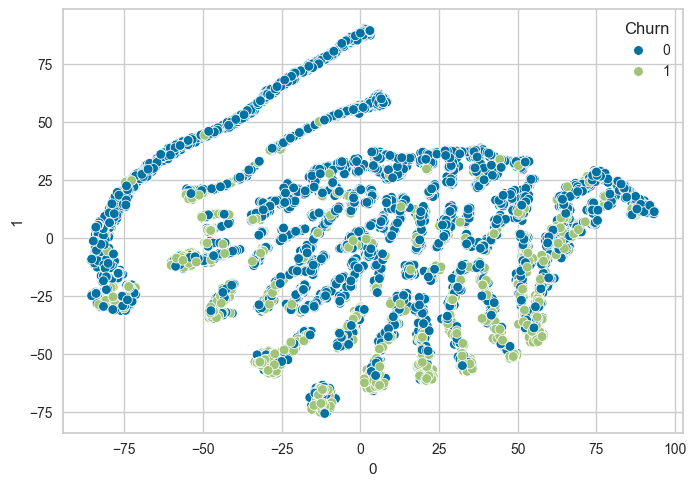

In [28]:
sns.scatterplot(df_tsne, x=0, y=1, hue=y)

### **Evaluation Methods**
1. **T-SNE**
2. **Silhouette Score**

### **1. KMeans**

In [29]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

In [30]:
pd.Series(labels).value_counts()

2    2186
1    1959
0    1745
3    1153
Name: count, dtype: int64

In [31]:
silhouette_score(X, labels)

0.4657094101182724

In [32]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X))

<Axes: xlabel='0', ylabel='1'>

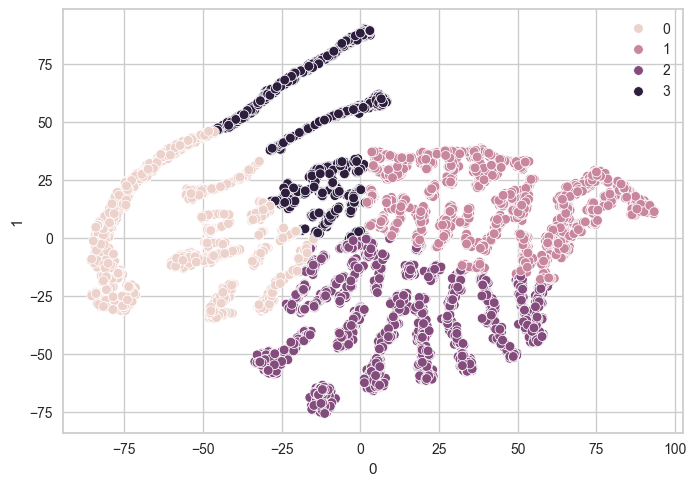

In [33]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

**Note**
- I will return to the preprocessing step to handle the **skewness**, for sure it will inhance the structure of sepreable classes.

In [40]:
df_log = df.copy()
df_sqrt = df.copy()
df_sq = df.copy()
df_cbrt = df.copy()
df_reciprocal = df.copy()
df_boxcox = df.copy()

In [41]:
df_log.TotalCharges = np.log(df_log.TotalCharges + 1)
df_log.MonthlyCharges = np.log(df_log.MonthlyCharges + 1)
df_log.tenure = np.log(df_log.tenure + 1)

df_sqrt.TotalCharges = np.sqrt(df_sqrt.TotalCharges)
df_sqrt.MonthlyCharges = np.sqrt(df_sqrt.MonthlyCharges)
df_sqrt.tenure = np.sqrt(df_sqrt.tenure)

df_sq.TotalCharges = df_sq.TotalCharges ** 2
df_sq.MonthlyCharges = df_sq.MonthlyCharges ** 2
df_sq.tenure = df_sq.tenure ** 2

df_cbrt.TotalCharges = np.cbrt(df_cbrt.TotalCharges)
df_cbrt.MonthlyCharges = np.cbrt(df_cbrt.MonthlyCharges)
df_cbrt.tenure = np.cbrt(df_log.tenure)

df_reciprocal.TotalCharges = 1 / (df_reciprocal.TotalCharges)
df_reciprocal.MonthlyCharges = 1 / (df_reciprocal.MonthlyCharges)
# df_reciprocal.tenure = 1 / df_reciprocal.tenure

df_boxcox.TotalCharges, _ = stats.boxcox(df_boxcox.TotalCharges)
df_boxcox.MonthlyCharges, _ = stats.boxcox(df_boxcox.MonthlyCharges)

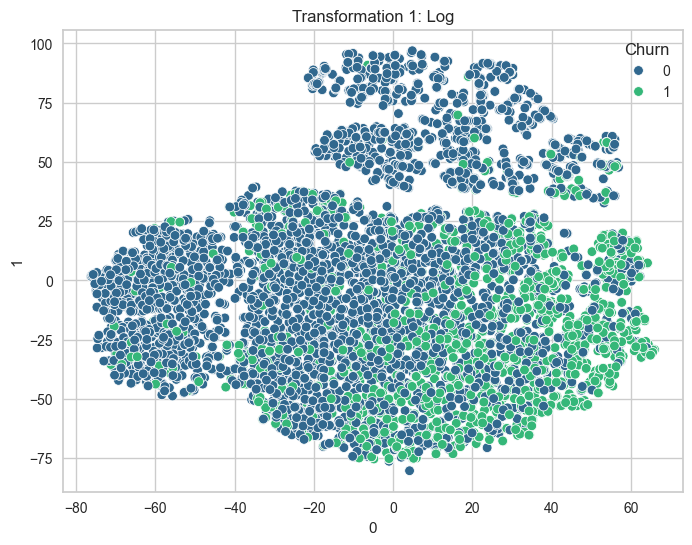

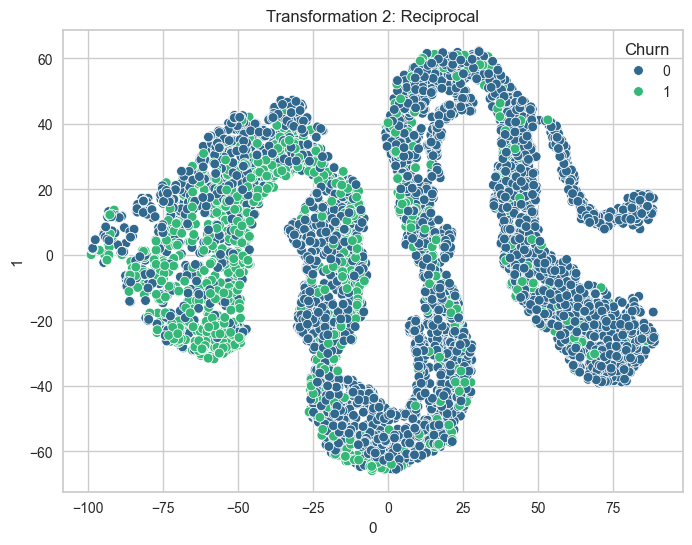

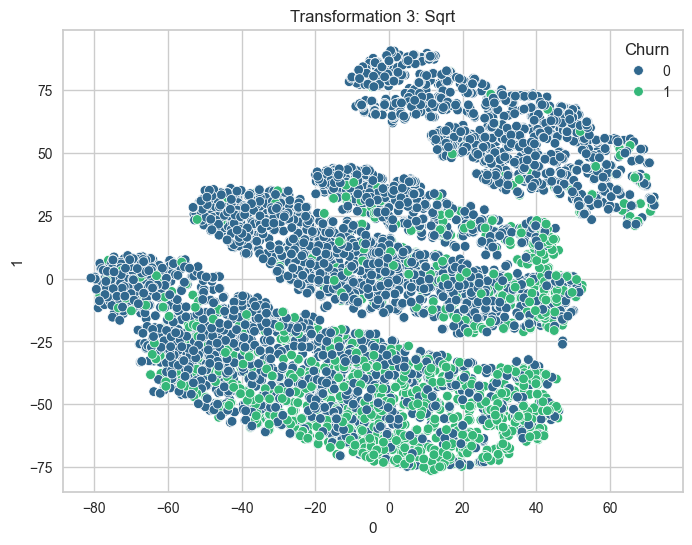

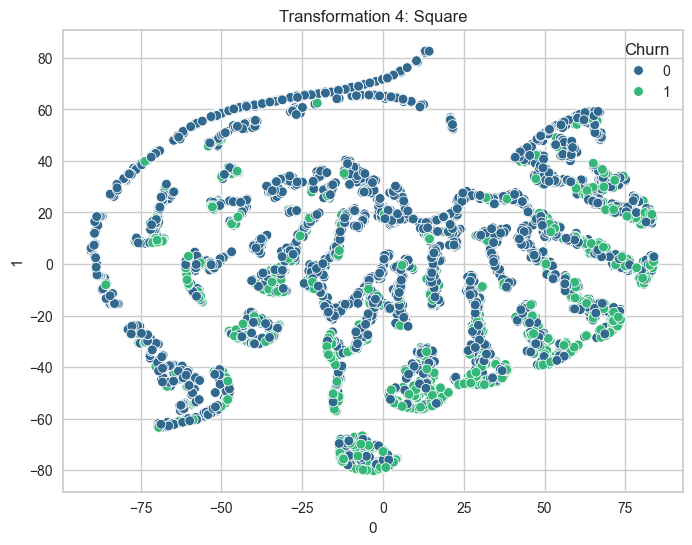

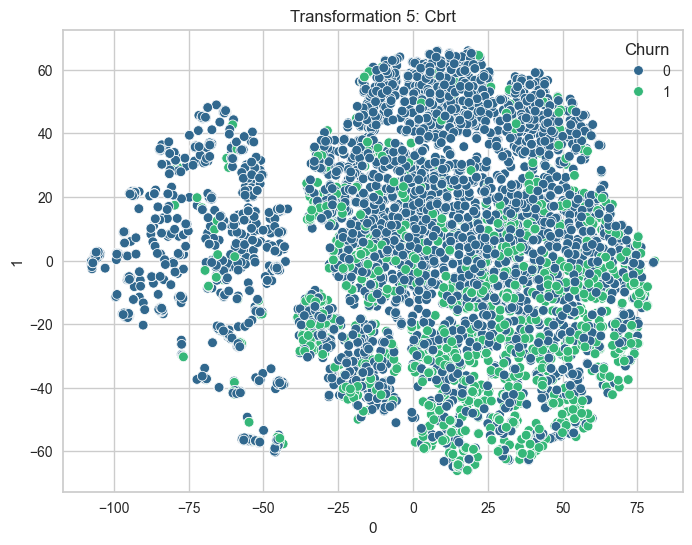

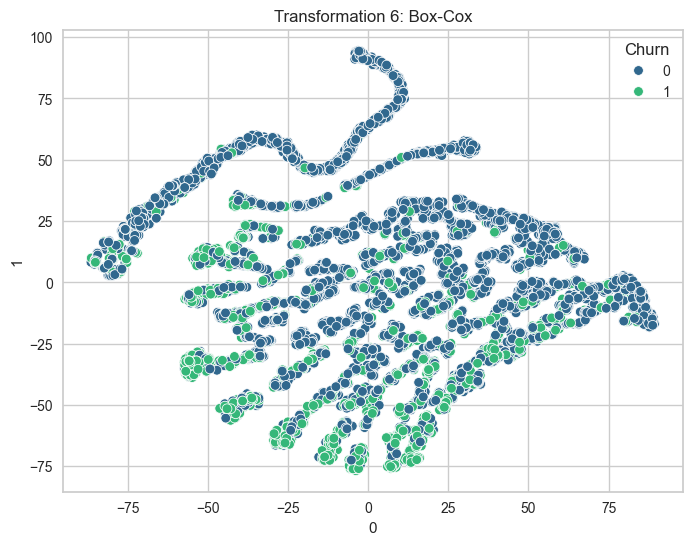

In [42]:
for i, df_ in enumerate([df_log, df_reciprocal, df_sqrt, df_sq, df_cbrt, df_boxcox]):
    features = df_.drop(columns=["Churn"])
    # kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++')
    # kmeans.fit(features)
    # labels = kmeans.labels_
    tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(features))
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=tsne, x=0, y=1, hue=y, palette="viridis")
    plt.title(f'Transformation {i + 1}: {["Log", "Reciprocal", "Sqrt", "Square", "Cbrt", "Box-Cox"][i]}')
    plt.show()

**Note**
- Some transformation techniques, for handling right skewed column, are with similar results which made the two classes more sepreable than before.
- But I will use Log or Reciprocal Transformation because i have noticed that thier results are the best. 
- I can select Log.

In [211]:
df_transformed = df_log.copy()
X_new = df_transformed.drop(columns=["Churn"])

25538.02720983015


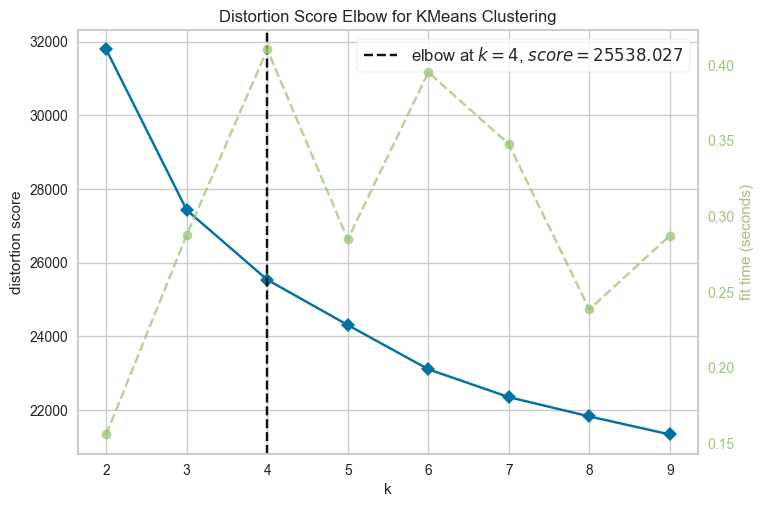

0.19435346201671788


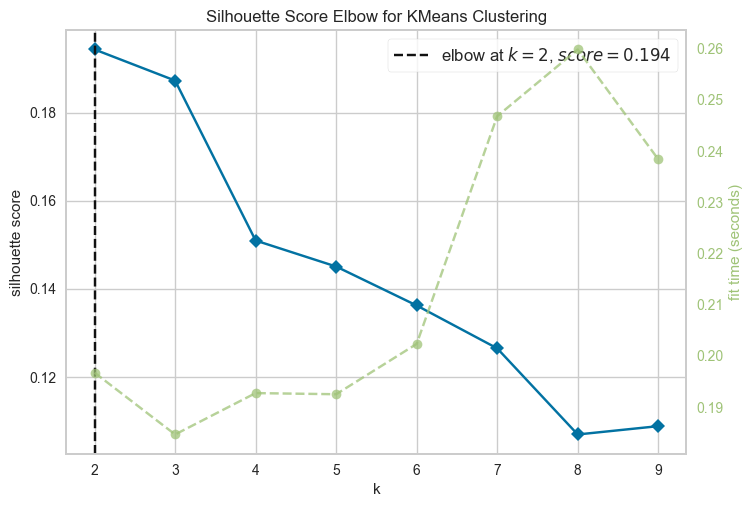

In [212]:
metrics = ['distortion', 'silhouette']
for metric in metrics:
    km = KMeans(random_state=0, n_init=10)
    visualizer = KElbowVisualizer(km, k=(2,10), metric=metric)
    visualizer.fit(X_new)
    print(visualizer.elbow_score_)
    visualizer.show() 

In [213]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(X)
labels = kmeans.labels_

In [214]:
silhouette_score(X_new, labels)

0.14439655473334165

<Axes: xlabel='0', ylabel='1'>

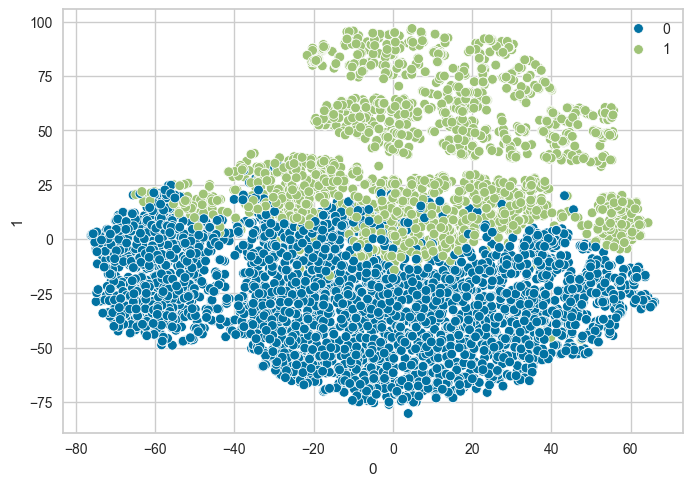

In [215]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_new))
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

**Note**
- Although silhouette_score was more better before the transformation (0.7 -> 0.43), But now the class more sepreable and that happened because of KMeans not the transformation, So i should try the following two solutions:
    - Hyperparameter Tuning.
    - Other Clustering Algorithms.

#### **Hyperparameter Tuning**

In [216]:
def objective(trial):
    n_init = trial.suggest_int('n_init', 10, 100)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    init = trial.suggest_categorical('init', ['k-means++', 'random'])


    model = KMeans(n_clusters=2, init=init, max_iter=max_iter, random_state=42, n_init=n_init)
    model.fit(X_new)
    labels = model.labels_
    

    score = silhouette_score(X_new, labels)
    return - score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {-study.best_value}")

[I 2024-09-20 16:36:25,246] A new study created in memory with name: no-name-30dbeeb6-c9b5-4a18-8cf2-0402e9af7c24
[I 2024-09-20 16:36:27,651] Trial 0 finished with value: -0.19435346201671788 and parameters: {'n_init': 50, 'max_iter': 581, 'init': 'k-means++'}. Best is trial 0 with value: -0.19435346201671788.
[I 2024-09-20 16:36:30,846] Trial 1 finished with value: -0.19435346201671788 and parameters: {'n_init': 84, 'max_iter': 433, 'init': 'k-means++'}. Best is trial 0 with value: -0.19435346201671788.
[I 2024-09-20 16:36:33,664] Trial 2 finished with value: -0.19435346201671788 and parameters: {'n_init': 98, 'max_iter': 153, 'init': 'random'}. Best is trial 0 with value: -0.19435346201671788.
[I 2024-09-20 16:36:36,614] Trial 3 finished with value: -0.19435346201671788 and parameters: {'n_init': 90, 'max_iter': 917, 'init': 'random'}. Best is trial 0 with value: -0.19435346201671788.
[I 2024-09-20 16:36:38,143] Trial 4 finished with value: -0.19435346201671788 and parameters: {'n_in

Best Parameters: {'n_init': 50, 'max_iter': 581, 'init': 'k-means++'}
Best Score: 0.19435346201671788


#### **KMeans (Final Results)**

In [220]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=581, init='k-means++')
kmeans.fit(X_new)
kmeans_labels = kmeans.labels_
silhouette_score(X_new, kmeans_labels)

0.19435346201671788

<Axes: xlabel='0', ylabel='1'>

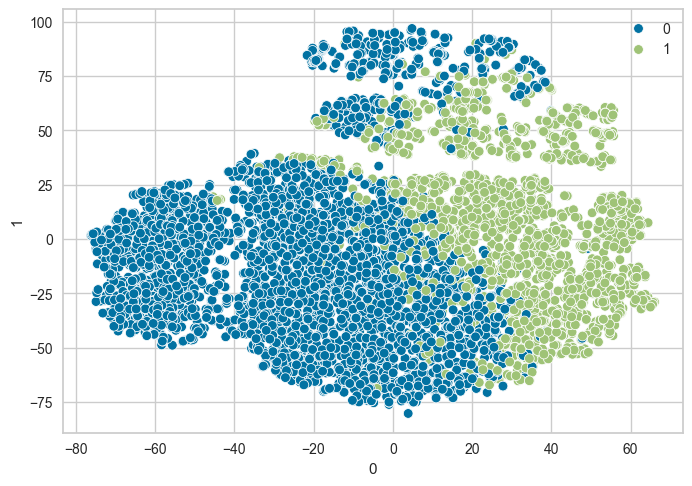

In [221]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

**Note**
- I will try another algorithms that maybe more powerful than Kmeans. like DBSCAN for example.

### **2. Hierarchial Clustering**

In [222]:
hierarch = AgglomerativeClustering(n_clusters=2).fit(X_new)

In [223]:
silhouette_score(X_new, hierarch.labels_)

0.1819126527577655

<Axes: xlabel='0', ylabel='1'>

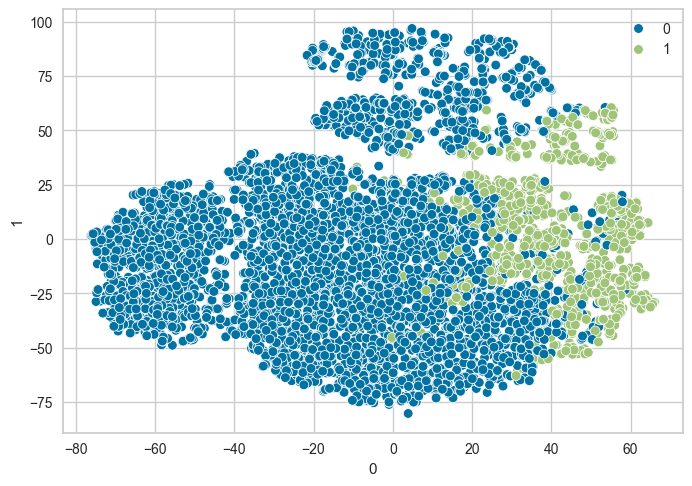

In [224]:
sns.scatterplot(df_tsne, x=0, y=1, hue=hierarch.labels_)

#### **Hyperparameter Tuning**

In [226]:
def objective(trial):

    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])
    
    if linkage == 'ward' and metric != 'euclidean':
        return float('inf')

    model = AgglomerativeClustering(n_clusters=2, metric=metric, linkage=linkage)

    model.fit(X_new)

    score = silhouette_score(X_new, model.labels_)
    return - score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {- study.best_value}")

[I 2024-09-20 16:42:06,578] A new study created in memory with name: no-name-36736050-ccc0-4567-aaea-0ea1ab28b4b7
[I 2024-09-20 16:42:09,235] Trial 0 finished with value: -0.18637115463417267 and parameters: {'metric': 'euclidean', 'linkage': 'complete'}. Best is trial 0 with value: -0.18637115463417267.
[I 2024-09-20 16:42:12,127] Trial 1 finished with value: -0.18239414471197693 and parameters: {'metric': 'euclidean', 'linkage': 'average'}. Best is trial 0 with value: -0.18637115463417267.
[I 2024-09-20 16:42:12,130] Trial 2 finished with value: inf and parameters: {'metric': 'cosine', 'linkage': 'ward'}. Best is trial 0 with value: -0.18637115463417267.
[I 2024-09-20 16:42:14,960] Trial 3 finished with value: -0.1819126527577655 and parameters: {'metric': 'euclidean', 'linkage': 'ward'}. Best is trial 0 with value: -0.18637115463417267.
[I 2024-09-20 16:42:19,112] Trial 4 finished with value: -0.1819126527577655 and parameters: {'metric': 'euclidean', 'linkage': 'ward'}. Best is tri

Best Parameters: {'metric': 'manhattan', 'linkage': 'average'}
Best Score: 0.24460402781630922


#### **Hierarchial Clustering (Final Results)**

In [230]:
hierarch = AgglomerativeClustering(n_clusters=2, linkage='average', metric='euclidean').fit(X_new)

In [231]:
silhouette_score(X_new, hierarch.labels_)

0.18239414471197693

<Axes: xlabel='0', ylabel='1'>

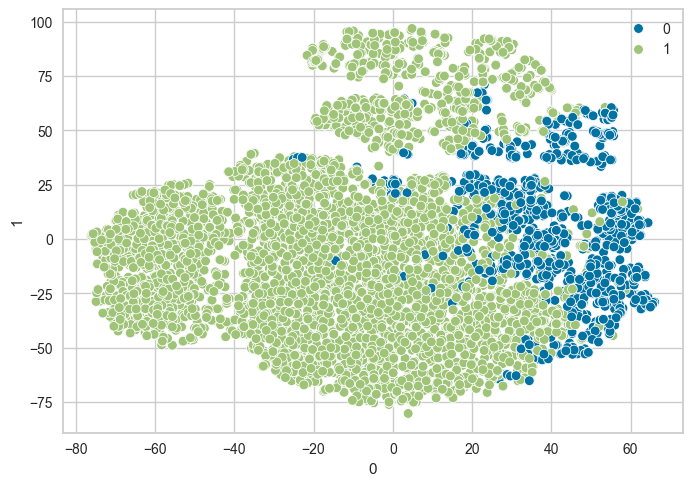

In [232]:
sns.scatterplot(df_tsne, x=0, y=1, hue=hierarch.labels_)

**Note**
- It's nearly similar to kmeans result, but still there are clustering mistakes.

### **3. DBSCAN**

In [233]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_new)

In [234]:
silhouette_score(X_new, dbscan.labels_)

-0.2497783979266748

<Axes: xlabel='0', ylabel='1'>

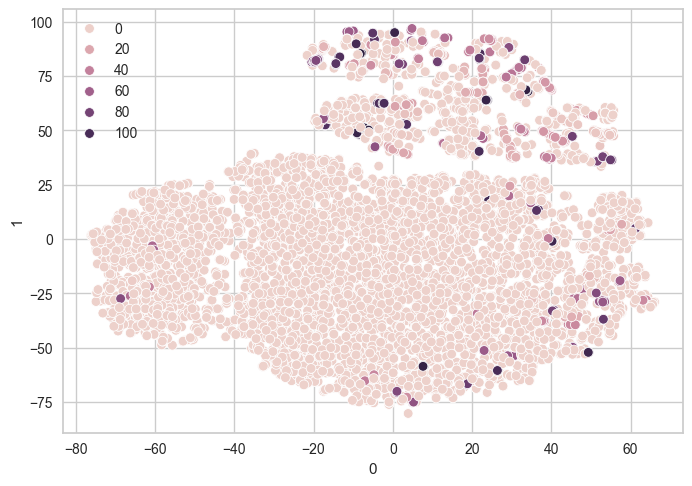

In [235]:
sns.scatterplot(df_tsne, x=0, y=1, hue=dbscan.labels_)

#### **Hyperparameter Tuning**

1. Choose min_samples:
    - A good starting point is using min_samples = D + 1, where D is the number of features (dimensions) in your dataset.
    - For datasets with noise or with some noise tolerance, increasing min_samples can help reduce noise sensitivity.

2. Choosing eps:
    - One common method for selecting eps is the k-distance graph:
        - Calculate the distance to the k-th nearest neighbor (usually k = min_samples - 1) for each point.
        - Plot the sorted k-distances.
        - Find the "elbow" or point of maximum curvature in this plot, which indicates the appropriate eps.

3. Visualize Clustering:
    - For lower-dimensional datasets, visually inspect the clusters formed by different eps values.
    - For higher-dimensional data, use dimensionality reduction techniques like PCA or t-SNE to visualize the clusters.


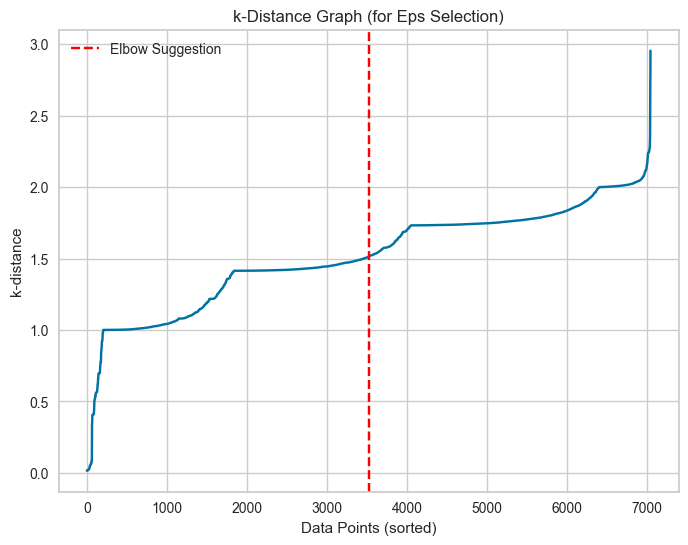

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

min_samples = 23
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_new)
distances, indices = nbrs.kneighbors(X_new)

k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 6))
plt.plot(k_distances)
plt.axvline(x=len(k_distances) // 2, color='red', linestyle='--', label="Elbow Suggestion")
plt.title('k-Distance Graph (for Eps Selection)')
plt.xlabel('Data Points (sorted)')
plt.ylabel('k-distance')
plt.grid(True)
plt.legend()
plt.show()

#### **DBSCAN (Final Results)**

In [272]:
dbscan = DBSCAN(eps=1.4, min_samples=min_samples).fit(X_new)

In [273]:
silhouette_score(X_new, dbscan.labels_)

-0.019077719663237142

In [274]:
## Removing the outliers to calculate the score
non_noise_mask = dbscan.labels_ != -1
non_noise_points = X_new[non_noise_mask]
non_noise_labels = dbscan.labels_[non_noise_mask]

silhouette_score(non_noise_points, non_noise_labels)

0.17446696153706232

In [275]:
from collections import Counter

a = dict(Counter(dbscan.labels_))
a

{-1: 3909, 0: 2904, 1: 217, 2: 13}

<Axes: xlabel='0', ylabel='1'>

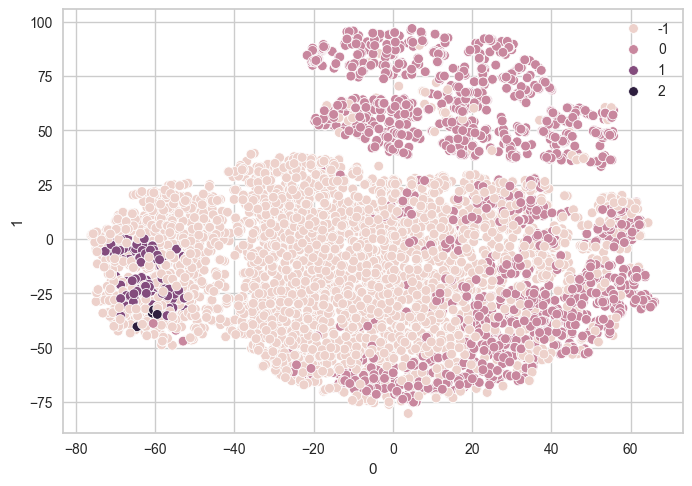

In [276]:
sns.scatterplot(df_tsne, x=0, y=1, hue=dbscan.labels_)

**Note**
- It's the best eps (1.4) and min_points with me untill now but more than two clusters.
- For sure, I will try another algorithms.
- But It's expected what happened because from the true labels or even the previous algorithms, the two cluster are overlapped, So DBSCAN isn't a good choice in this case.

### **4. GaussianMixture (GMM)**

In [277]:
gm = GaussianMixture(init_params='kmeans', n_components=2, random_state=42)
labels = gm.fit_predict(X_new)

In [278]:
silhouette_score(X_new, labels)

0.10787221342385285

<Axes: xlabel='0', ylabel='1'>

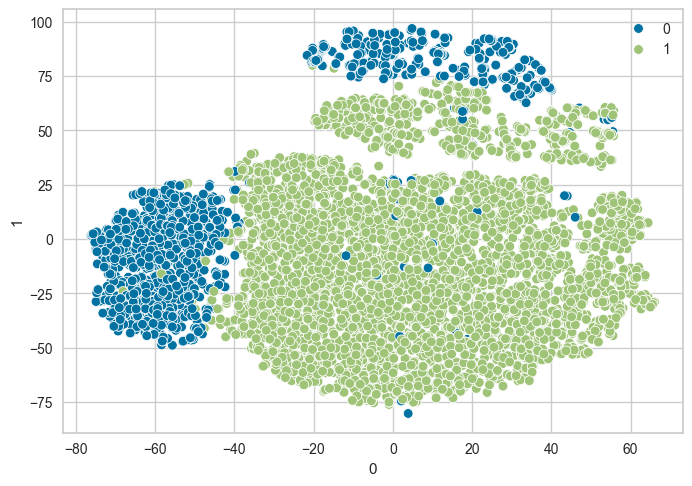

In [279]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

**Note**
- I will apply some of hyperparamter tuning for fUther enhancement.

In [280]:
def objective(trial):
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    init_params = trial.suggest_categorical('init_params', ['kmeans'])

    gmm = GaussianMixture(n_components=2, covariance_type=covariance_type, init_params=init_params, random_state=42)
    labels = gmm.fit_predict(X_new)

    try:
        score = silhouette_score(X_new, labels)
    except ValueError:
        score = 1.0
    
    return -score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {-study.best_value}")

[I 2024-09-20 16:52:40,993] A new study created in memory with name: no-name-62be606b-fe20-40bf-a4eb-3493a3aa4ae3
[I 2024-09-20 16:52:42,159] Trial 0 finished with value: -0.13907970182683432 and parameters: {'covariance_type': 'diag', 'init_params': 'kmeans'}. Best is trial 0 with value: -0.13907970182683432.
[I 2024-09-20 16:52:43,854] Trial 1 finished with value: -0.17658845235189502 and parameters: {'covariance_type': 'tied', 'init_params': 'kmeans'}. Best is trial 0 with value: -0.13907970182683432.
[I 2024-09-20 16:52:45,226] Trial 2 finished with value: -0.17658845235189502 and parameters: {'covariance_type': 'tied', 'init_params': 'kmeans'}. Best is trial 0 with value: -0.13907970182683432.
[I 2024-09-20 16:52:46,357] Trial 3 finished with value: -0.1974306903465018 and parameters: {'covariance_type': 'spherical', 'init_params': 'kmeans'}. Best is trial 0 with value: -0.13907970182683432.
[I 2024-09-20 16:52:47,880] Trial 4 finished with value: -0.17658845235189502 and paramete

Best Parameters: {'covariance_type': 'full', 'init_params': 'kmeans'}
Best Score: 0.10787221342385285


#### **Gaussian Mixture (Final Results)**

In [287]:
gm = GaussianMixture(init_params='kmeans', n_components=2, random_state=42, covariance_type='diag')
gm_labels = gm.fit_predict(X_new)

In [288]:
silhouette_score(X_new, labels)

0.10787221342385285

<Axes: xlabel='0', ylabel='1'>

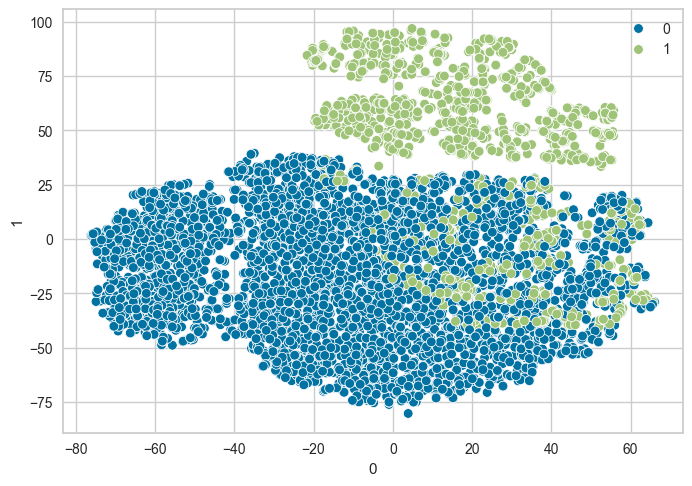

In [289]:
sns.scatterplot(df_tsne, x=0, y=1, hue=gm_labels)

**Note**
- Really it's the best result that i search for among others.
- Let's say also "For Now", Because I will search for more algorithms.

### **5. Isolation Forest**

In [290]:
irf = IsolationForest(random_state=0)
labels = irf.fit_predict(X_new)

<Axes: xlabel='0', ylabel='1'>

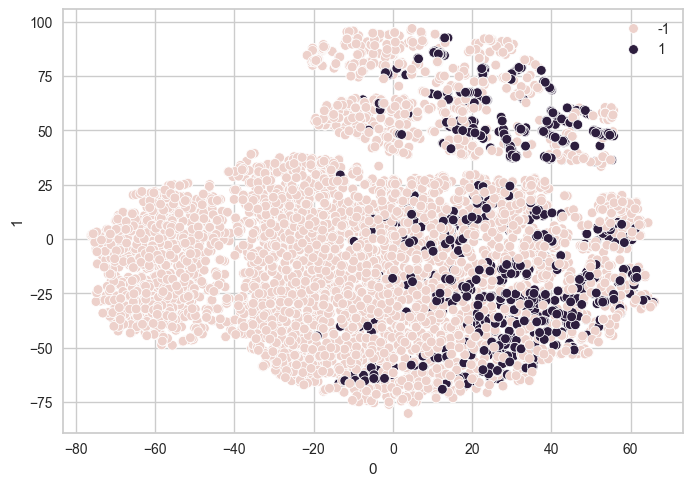

In [291]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

In [292]:
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_samples = trial.suggest_int('max_samples', 50, X_new.shape[0])
    max_features = trial.suggest_int('max_features', 1, X_new.shape[1])
    
    iso_forest = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, random_state=42)
    labels = iso_forest.fit_predict(X_new)
    
    try:
        silhouette_avg = silhouette_score(X_new, labels)
    except ValueError:
        silhouette_avg = -1.0

    return silhouette_avg

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")

[I 2024-09-20 16:54:44,769] A new study created in memory with name: no-name-6d7aa57f-3413-46f1-a2f6-a38832281053
[I 2024-09-20 16:54:46,511] Trial 0 finished with value: 0.04672685045579727 and parameters: {'n_estimators': 124, 'max_samples': 3015, 'max_features': 14}. Best is trial 0 with value: 0.04672685045579727.
[I 2024-09-20 16:54:48,531] Trial 1 finished with value: 0.039733398678319015 and parameters: {'n_estimators': 248, 'max_samples': 1790, 'max_features': 23}. Best is trial 0 with value: 0.04672685045579727.
[I 2024-09-20 16:54:50,206] Trial 2 finished with value: 0.040611472096395144 and parameters: {'n_estimators': 143, 'max_samples': 974, 'max_features': 16}. Best is trial 0 with value: 0.04672685045579727.
[I 2024-09-20 16:54:53,646] Trial 3 finished with value: 0.04393816772154156 and parameters: {'n_estimators': 304, 'max_samples': 5755, 'max_features': 19}. Best is trial 0 with value: 0.04672685045579727.
[I 2024-09-20 16:54:55,534] Trial 4 finished with value: 0.04

Best Parameters: {'n_estimators': 150, 'max_samples': 2104, 'max_features': 10}
Best Score: 0.048564840372519895


#### **Isolation Forest (Final Results)**

In [293]:
irf = IsolationForest(n_estimators=150, max_samples=2104, max_features=10, random_state=0)
labels = irf.fit_predict(X_new)

<Axes: xlabel='0', ylabel='1'>

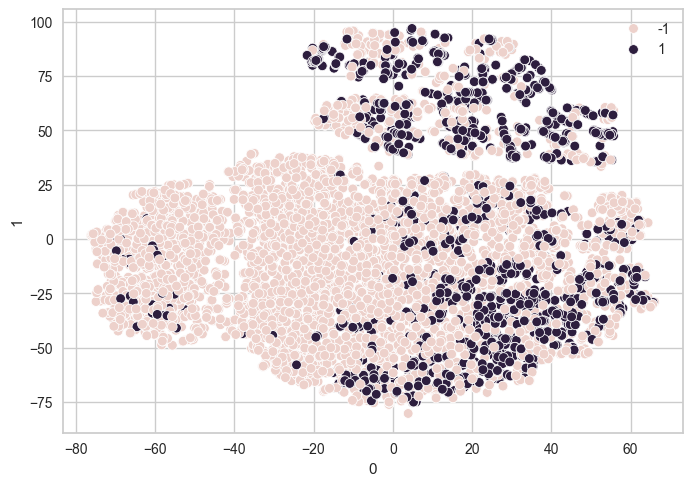

In [294]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)

**Note**
- It's better than before but there are other better algorithms.

### **Final Results**
- Kmeans and Hierarchial Clustering are the best ones..
- So I will use Kmeans to extract the insights and the information of each cluster.
- To do so (extract the insights), I will plot the percentage of customers in each cluater for each feature.
- So, for example, If the percentage of customers of specific feature is high in cluster and low in the other. It means that this feature describe the cluster more clearly, So easily I can depend on this feature to differenciate the current or new customer belongs to which cluster.

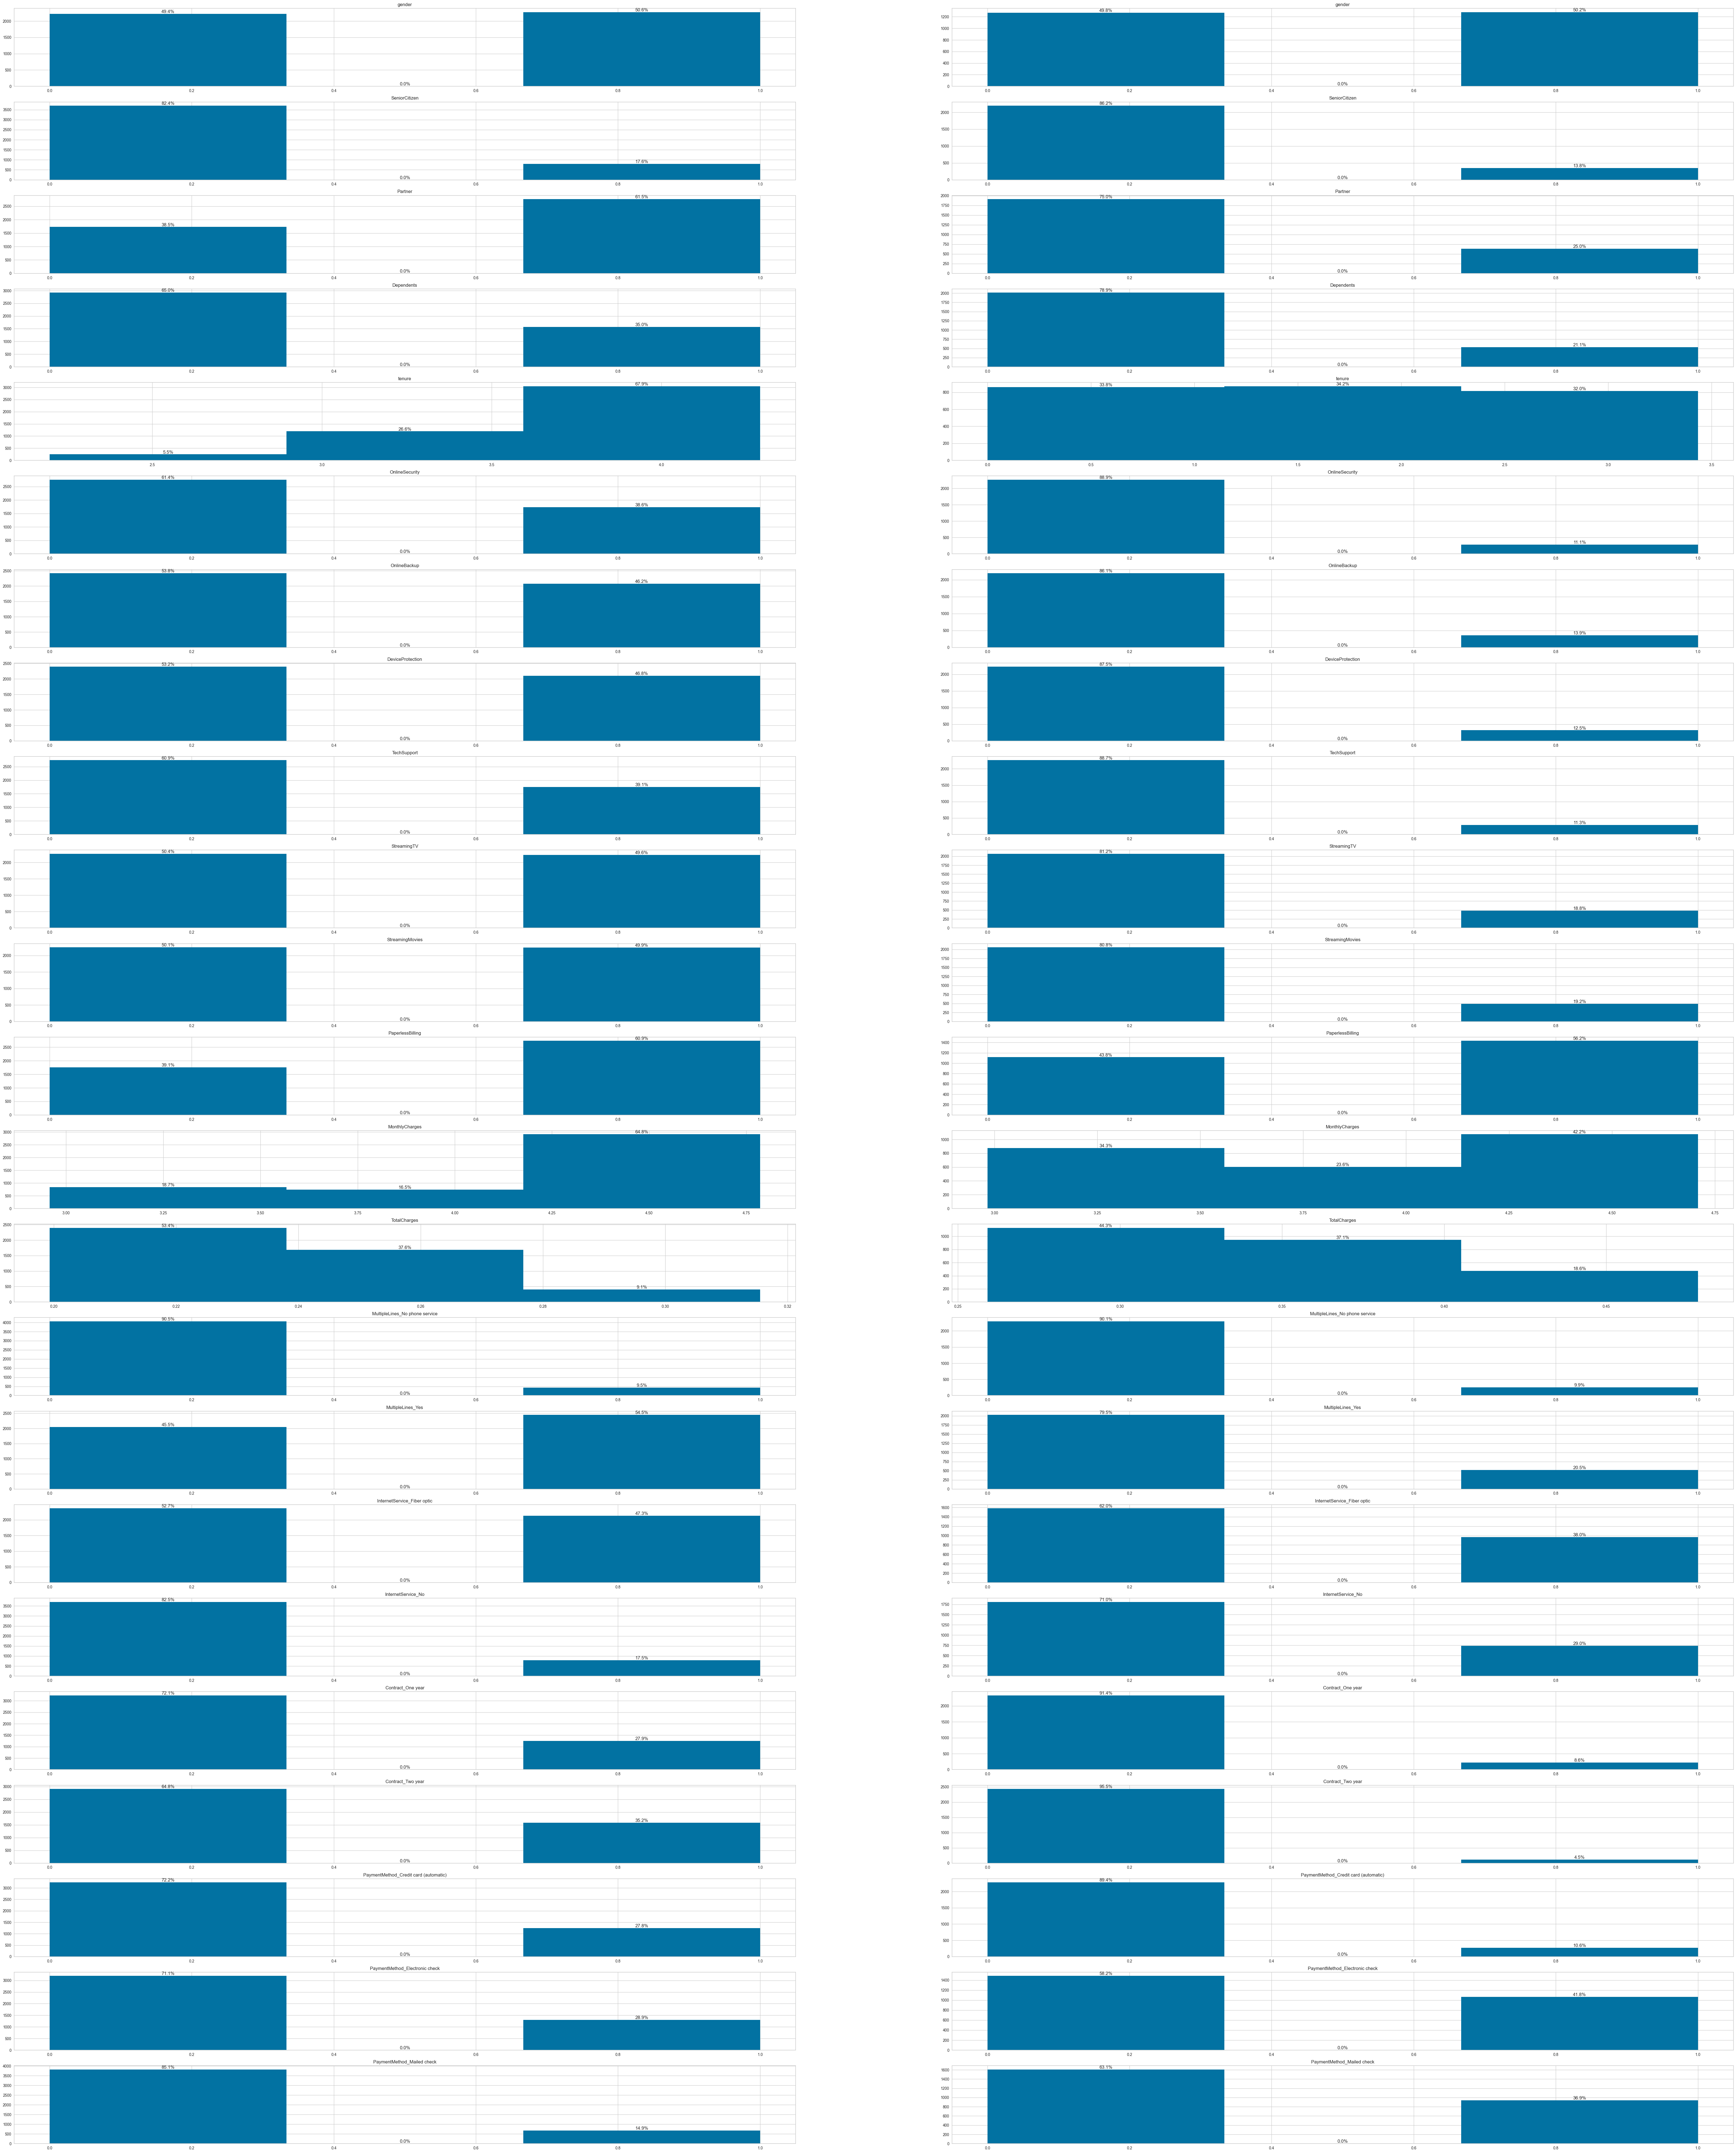

In [297]:
num_features = len(X.columns)
fig, ax = plt.subplots(num_features, 2, figsize=(80, 100))

for column in X.columns:    
    feature_index = X.columns.get_loc(column)
    
    for label in range(2):    
        ax[feature_index, label].hist(df_log[column][np.where(kmeans_labels == label)[0]], bins=3)
        
        counts, bins = np.histogram(df_log[column][np.where(kmeans_labels == label)[0]], bins=3)
        percentages = [(count / len(df_log[column][np.where(kmeans_labels == label)[0]])) * 100 for count in counts]

        for i in range(len(bins) - 1):
            bin_center = (bins[i] + bins[i + 1]) / 2
            ax[feature_index, label].text(bin_center, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')

        ax[feature_index, label].title.set_text(column)

### **Our Insights**

**First Cluster**

- First Cluster includes customers with high tenure.
- First Cluster uses almost all services provided by telecom company.
- First Cluster has a high percentage of customers that use paperless billing.
- First Cluster includes customers with very high amount charged monthly.
- First Cluster uses multiple lines.
- First Cluster includes many customers with 1 and 2-year contract.
- First Cluster use automatic and electronic check in payment more, not highly use mailed check.

**Second Cluster**
- Second Cluster includes customers with low tenure compared to first cluster.
- Second Cluster uses the services slightly.
- Second Cluster has a low percentage of customers that use paperless billing.
- Second Cluster includes customers with low or moderate amount charged monthly.
- Second Cluster doesn't use multiple lines.
- Second Cluster nearly doesn't include customers with 1 and 2-year contract, include more customers with month-to-month contract.
- Second Cluster use electronic and mailed check more.

### **From Previous Insights**

- It's Expected that **First** Cluster is the **Not Churn** Cluster, and the **Second** is the **Churn** Cluster.

- Because first cluster
    - high tenure.
    - charges monthly with a high amount and have multiple lines that it means they are satisfied about the provided telecom service.
    - uses all company services that it means they are very engaged and comfortable with using the system.
    - adopt the 1 and 2-year contract.

- Unlike the second cluster
    - low tenure
    - doesn't charge monthly with high amounts.
    - doesn't use the multiple lines.
    - adopt the month-to-month contracts.

### **Solutions For Retention**

1. Make discounts for first cluster because they charge monthly with high amounts.
2. Make gifts (free sevices for period) for first cluster in year anniversery to strength their belonging and loyalty with the company.
2. Make an electronic, mailed adversements and offers for customers in second cluster.
3. Make offers for second cluster customers on using addition or new phone lines 

## **Another Clustering Approach**

- I will use transformed data via Square Root Transformation to make the clustering.
- From previous techniques:
   - Distortion (4) and Silhouette (2): **Average (3)**
   - Complete Dendogram
   - T-SNE
- I will select **(3)** as a number of cluster.

In [336]:
df_transformed = df_sqrt.copy()
X_sqrt = df_transformed.drop(columns=["Churn"])

39107.64588269814


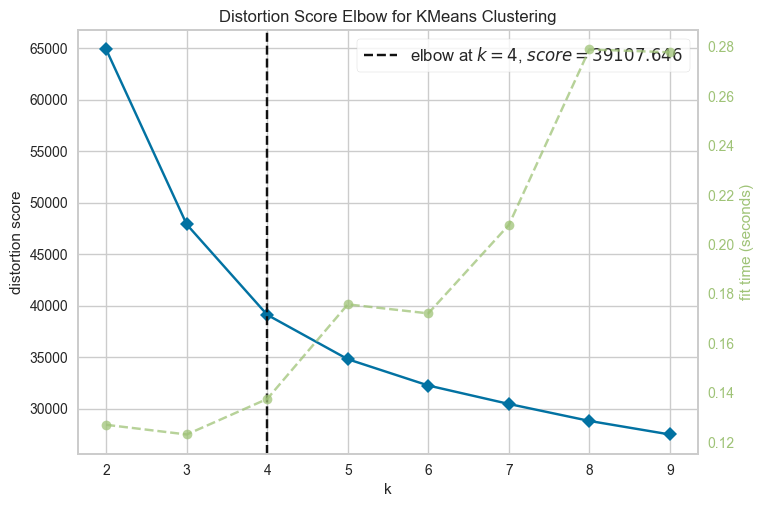

0.31249593676708526


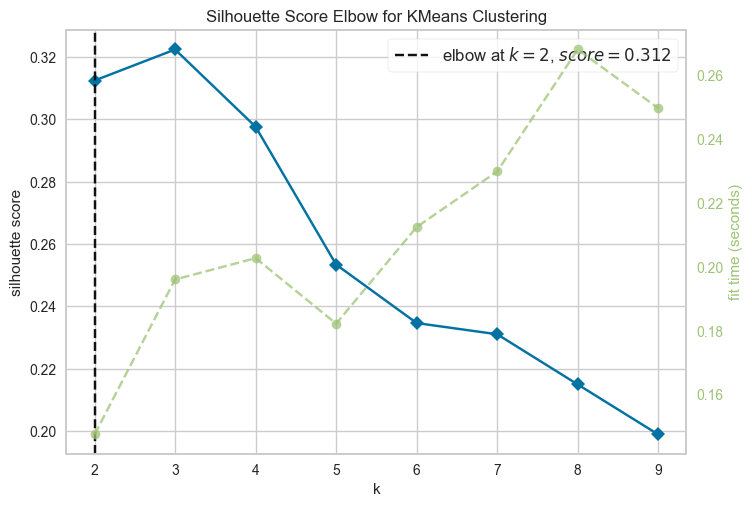

In [337]:
metrics = ['distortion', 'silhouette']
for metric in metrics:
    km = KMeans(random_state=0, n_init=10)
    visualizer = KElbowVisualizer(km, k=(2,10), metric=metric)
    visualizer.fit(X_sqrt)
    print(visualizer.elbow_score_)
    visualizer.show() 

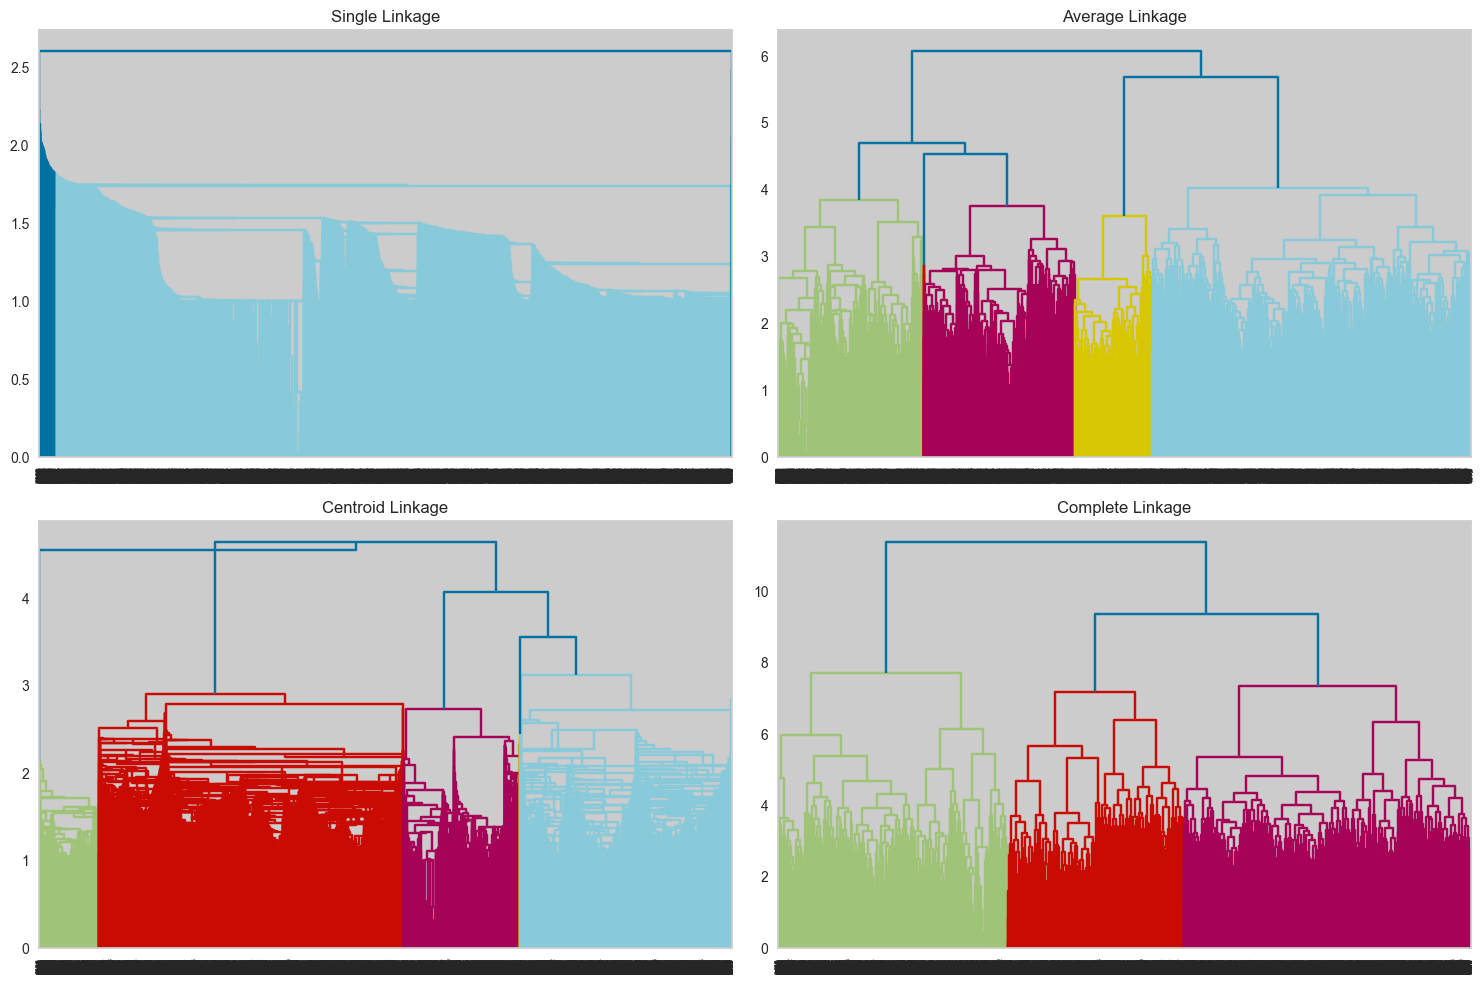

In [338]:
methods = ['single', 'average', 'centroid', 'complete']


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, method in enumerate(methods):
    plt.sca(axes[i])
    plt.title(f"{method.capitalize()} Linkage")
    dend = shc.dendrogram(shc.linkage(X_sqrt, method=method, metric='euclidean'))

plt.tight_layout()
plt.show()

<Axes: xlabel='0', ylabel='1'>

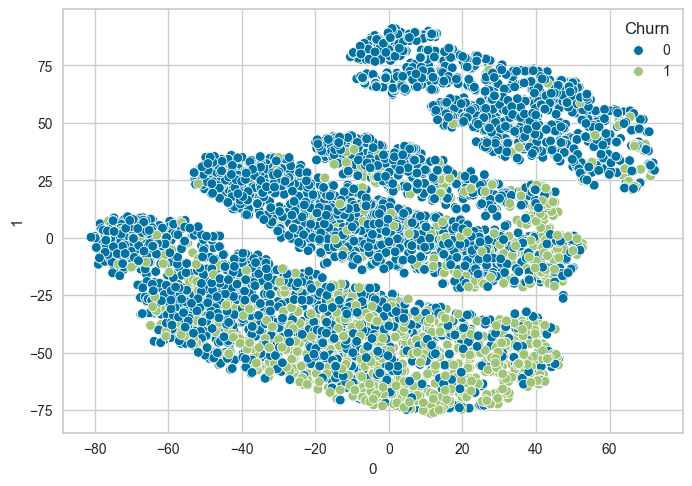

In [340]:
df_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_sqrt))
sns.scatterplot(df_tsne, x=0, y=1, hue=y)

### **DBSCAN**

In [397]:
dbscan = DBSCAN(eps=1.68, min_samples=20).fit(X_sqrt)

<Axes: xlabel='0', ylabel='1'>

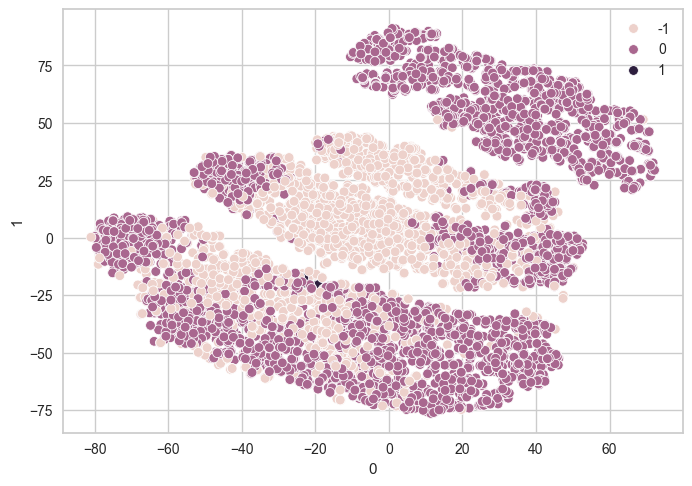

In [398]:
sns.scatterplot(df_tsne, x=0, y=1, hue=dbscan.labels_)

### **GMM**

In [377]:
gm = GaussianMixture(init_params='kmeans', n_components=3, random_state=42, covariance_type='full')
labels = gm.fit_predict(X_new)

<Axes: xlabel='0', ylabel='1'>

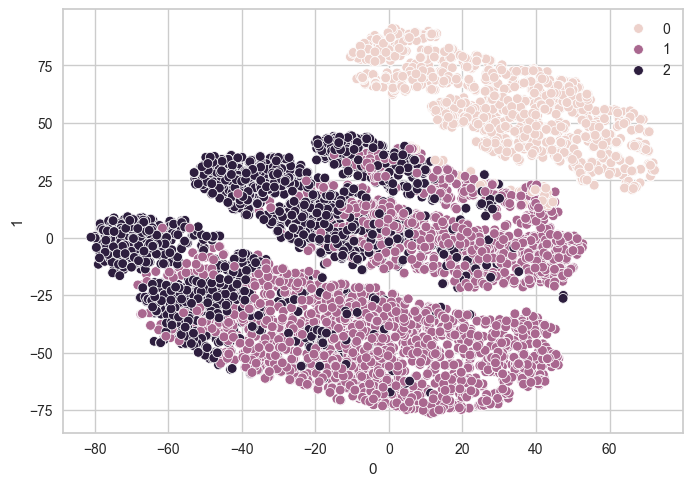

In [378]:
sns.scatterplot(df_tsne, x=0, y=1, hue=labels)